### Author : George Orzanescu

#### Project description : 

The case is about a bank (Thera Bank) . The management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

#### Project goal: 

Build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

#### Attribute Information

    ID: Customer ID
    Age: Customer's age in completed years
    Experience : #years of professional experience
    Income: Annual income of the customer (thousand dollars)
    ZIP Code: Home Address ZIP code.
    Family: Family size of the customer
    CCAvg: Avg. spending on credit cards per month (thousand dollars)
    Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
    Mortgage: Value of house mortgage if any. (thousand dollars)
    Personal Loan: Did this customer accept the personal loan offered in the last campaign?
    Securities Account: Does the customer have a securities account with the bank?
    CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
    Online: Does the customer use internet banking facilities?
    Credit card: Does the customer use a credit card issued by bank

#### Data Description: The csv contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

In [130]:
# Importing packages 
import pandas as pd
import numpy as np
import seaborn as sns

In [131]:
# Import regression models and metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix ,recall_score
from sklearn.model_selection import train_test_split

In [132]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [133]:
# Reading the data as dataframe and print the first five rows
data = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [134]:
# Get info on the dataframe and check for null values or missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Exploratory data analysis

In [135]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Information on type of variable (min -max values)
    - ID : categorical ,qualitative , nominal variable .  min = 0   max = 5000
    - Age : numerical , quantitative. Min age in the dataset being 23 and max being 67.
    - Experience : numerical , quantitative. Min experience is -3  which seems to be a typographical error , max is 43
    - Income : numerical,quantitative . min value is 8000 dollars while the maximum income is 224.000 dollars
    - ZIP Code : categorical ,qualitative , nominal
    - Family : categorical , qualitative . min is 1 max is 4
    - CCAvg : numerical , quantitative. min value is 0 , max value is 10 000 dollars
    - Education : categorical ,qualitative : 1: Undergrad; 2: Graduate; 3: Advanced/Professional.
    - Mortgage : numerical , quantitative . min mortgage value is 0 dollars (means there is no house mortgage) 
      max values is 635.000 dollars
    - Personal Loan : the target variable . Qualitative , nominal ,categorical(binary). YES for loan = 1 ; NO for loan = 0
    - Securities Account : categorical(binary) ,qualitative,nominal. If the customer has a securities account with the 
      bank then 1 else 0
    - CD Account : categorical (binary), qualitatitve, nominal. If the customer has a certificate of deposit (CD) account 
      with the bank then 1 else 0.
    - Online : categorical (binary), qualitatitve, nominal. If the customer uses internet banking facilities then 1 else 0.
    - CreditCard : categorical (binary), qualitative, nominal. If the customer use a credit card issued by UniversalBank 
      then 1 else 0.
   
    

### Descriptive statistics for the numerical variables 

    - Age : Mean(45.3)  and Median (50% = 45.0)  is almost the same. Age is normally distributed.
    - Experience : Mean(20.1) and Median (50% = 20.0) are also almost the same. Experience is also distributed normally.
    - Income : Here mean value(73.77)  is greater than median (64.0). Income is right skewed. In distribution plot will 
      see a tail to the left. Also the Q1 - Q3 is 39 to 98 , while max is 224 so maybe some outliers there.
    - CCAvg : same as Income, mean is 1.9 while median is 1.5 . CCAvg is right skewed .
    - Mortgage : the median is 0 ( no mortgage customers)   but mean is 56.49  and 75% is 101.0 while max is 635  ,
      a higly skewed distribution to the right.

In [136]:
# Let us look at the target column which is 'Personal Loan' to understand how the data is distributed 
data.groupby(["Personal Loan"]).count()

# we have 4520 records with 0( no personal loan)  and 480 record with 1( yes personal loan).
# The ratio is almost 1:10 in favor or class 0.
# The model's ability to predict class 0 will be better than predicting class 1. 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


c:\users\tohob\desktop\jupytervenv\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\tohob\desktop\jupytervenv\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\tohob\desktop\jupytervenv\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


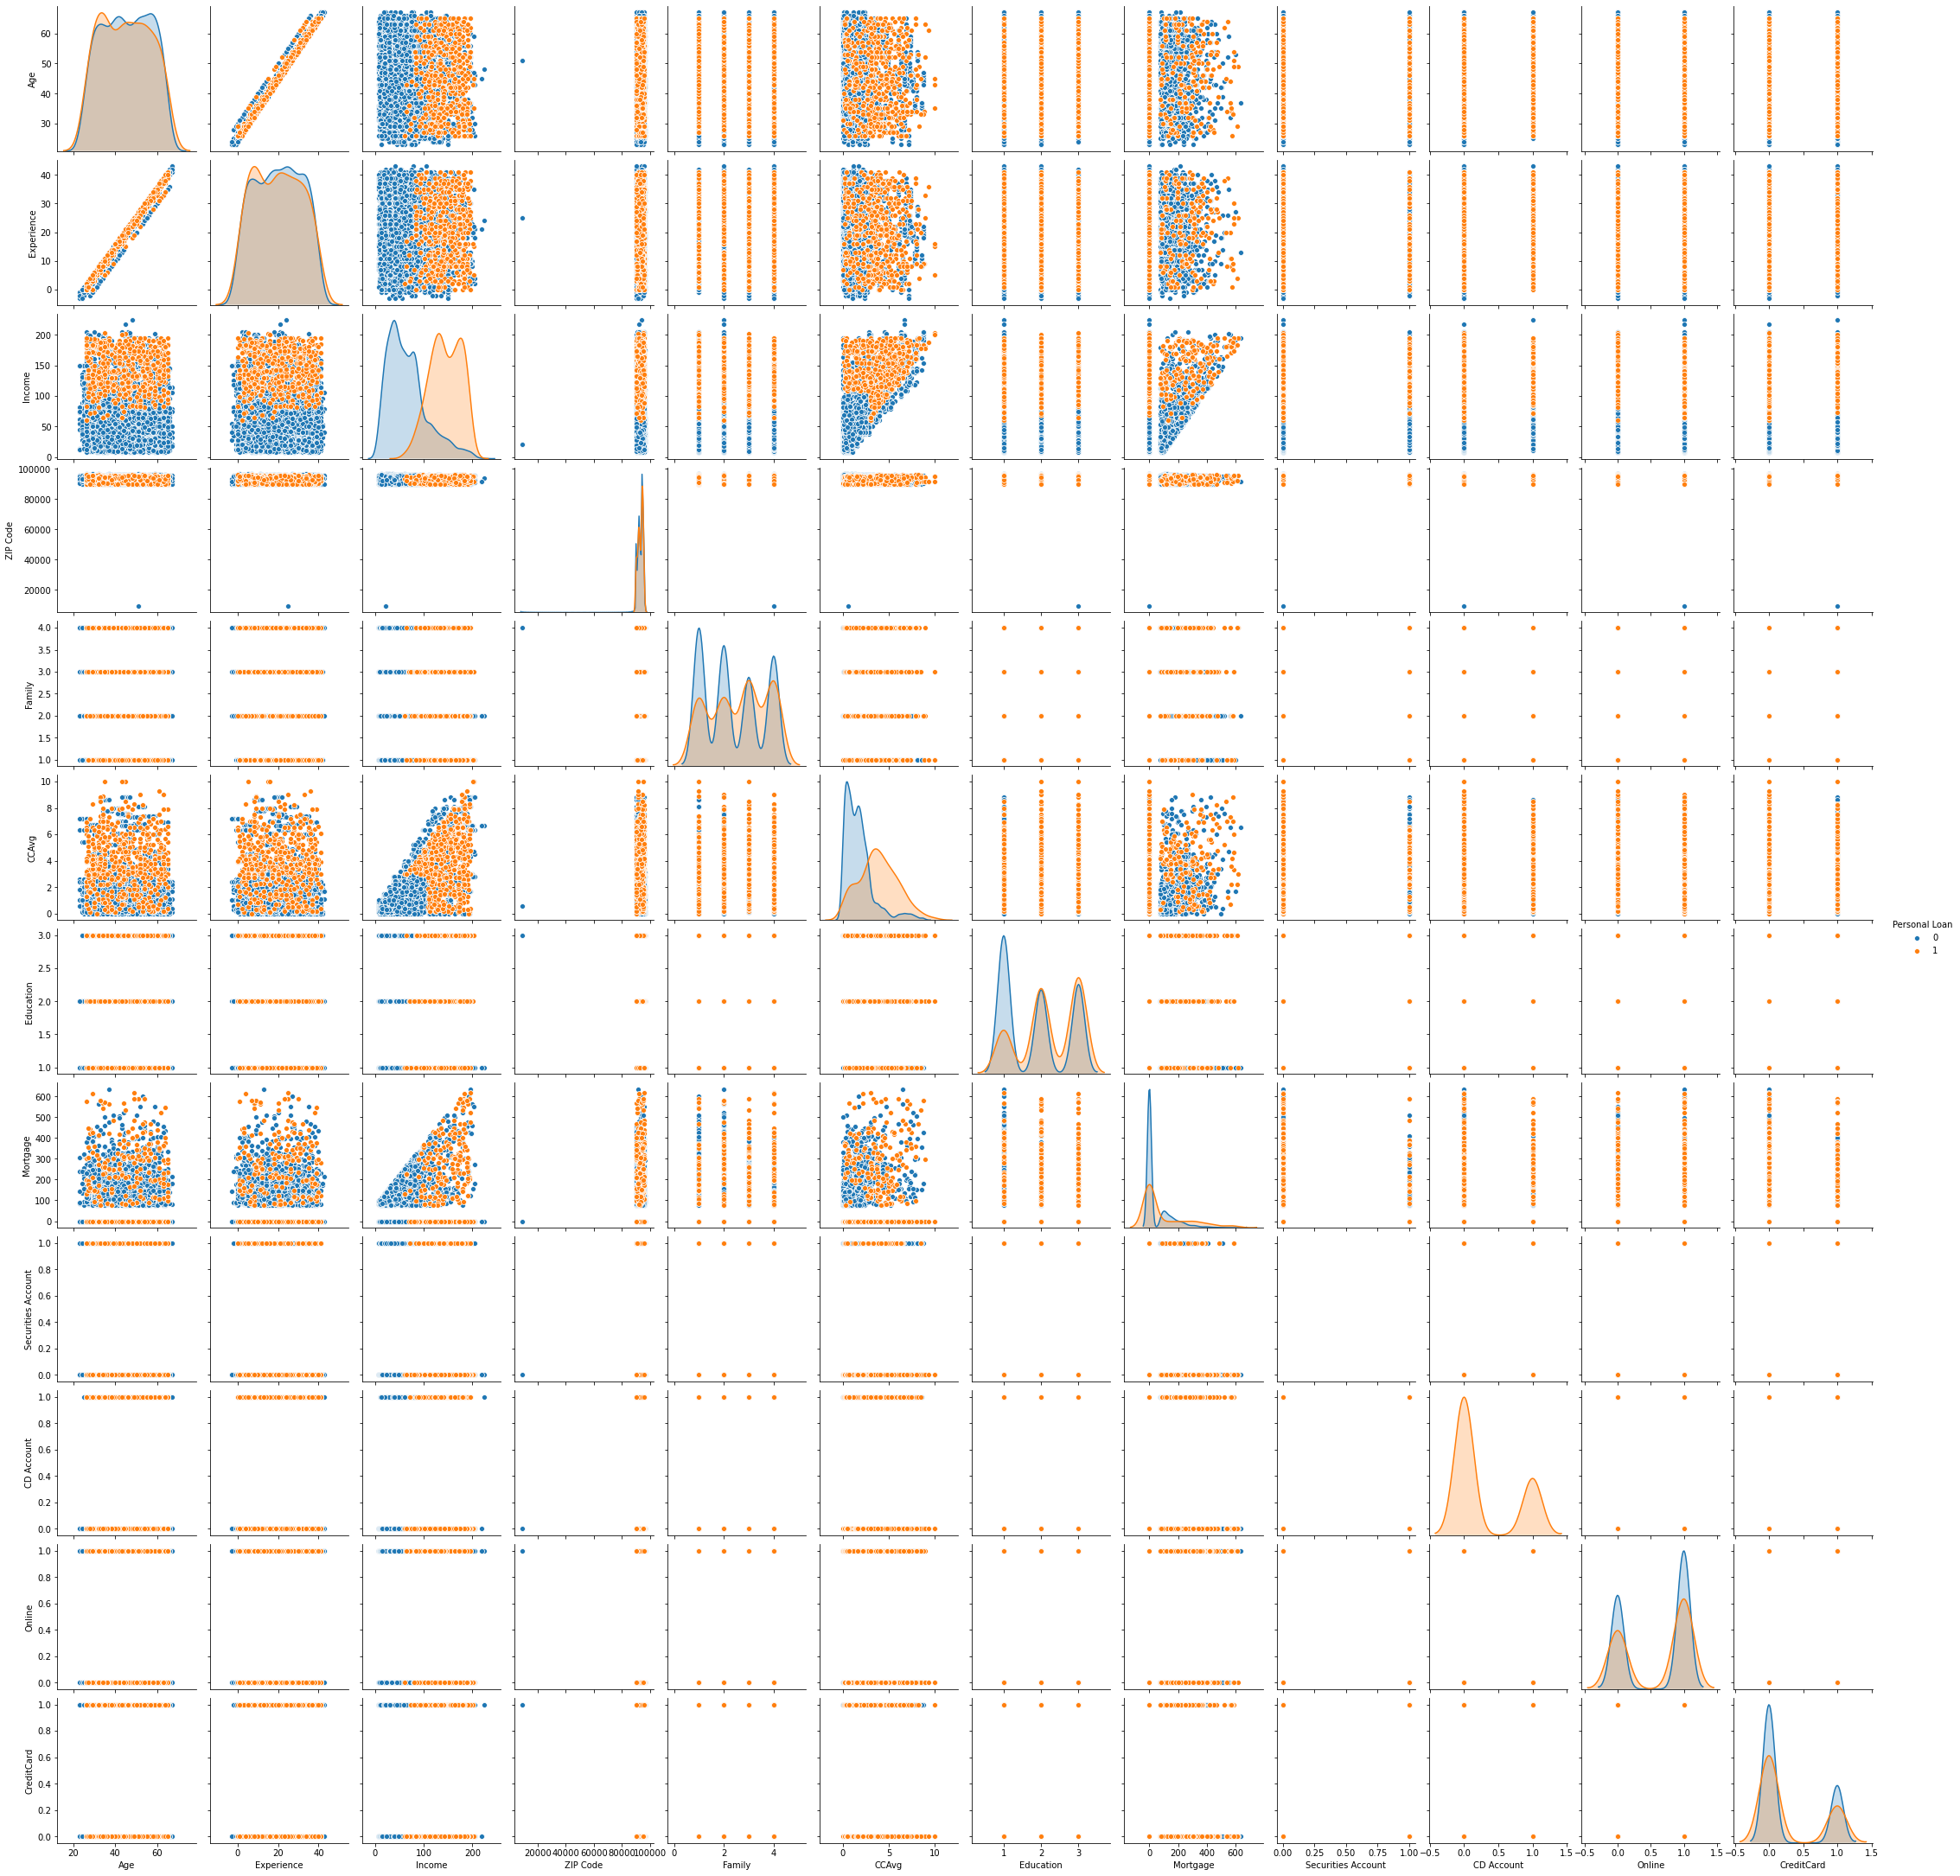

In [137]:
plotdata = data.drop('ID',axis =1)  #dropping the id column for our pairplot
sns.pairplot(plotdata, hue = 'Personal Loan')

### Observation from pairplots:
    
    - Age and Experience is normaly distributed with a strong corellation between the two
    - ZIP Code has one outlier value which is less than 10K.
    - Income , as we deducted from the mean > median , has a right tail distribution. But we can see that people taking 
      personal loans have a significantly different income distribution then people who don't 
    - Family  size is also an important factor for people considering taking personal loan from bank , we see an 
      overlapping of families with 3 and 4 kids especialy.
    - CCAvg : Average spending on cards differs for people taking the personal loan and those who aren't taking 
      the personal loan. Also the distribution is skewed to the right producing a long tail to the left.
    - Personal Loan , Securities Account , CD Account , CreditCard has lots of 0 values with few 1.
    - CreditCard and Online both have low corellation with Personal Loan as we see almost a perfect overlapping
      and distribution between them 
    - Online is balanced in favor of 1 but more equilibrated 
    - Education has more 1: Undergrad values , but we can see a a corellation on the distribution of people who took 
      loans being more in the 2: Graduate; 3: Advanced/Professional categories.
    - Mortgage has a majority of 0 values (no mortgage)  and there is a corellation between income and mortgage

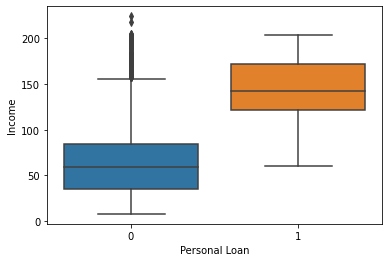

In [138]:
# Distribution of Income by Personal Loan
sns.boxplot( x = 'Personal Loan' , y = 'Income' ,data = data)

### Higher incomed people have taken a loan from the bank in the last campaign

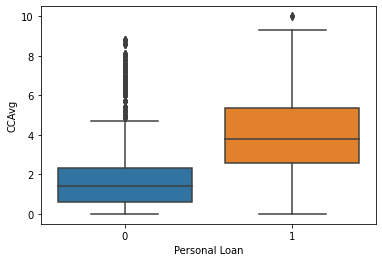

In [139]:
# Distribution of Average Spending on Credit Card by Personal Loan
sns.boxplot( x = 'Personal Loan' , y = 'CCAvg' ,data = data)

### Average spending on credit cards by people taking personal loan is higher than those who aren't taking personal loan

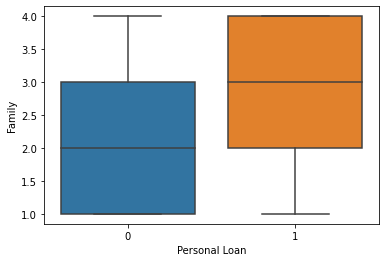

In [140]:
# Distribution of Family Size by Personal Loan 
sns.boxplot( x = 'Personal Loan' , y = 'Family' ,data = data)

### Families with more members have taken loans from the bank in the last campaign

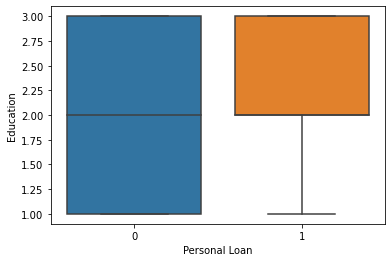

In [141]:
sns.boxplot( x = 'Personal Loan' , y = 'Education' ,data = data)

### Number of people taking personal loan increases with increase in education level.

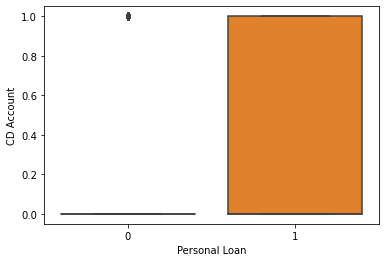

In [142]:
sns.boxplot( x = 'Personal Loan' , y = 'CD Account' ,data = data)

### Most of the people who don't have CD Account don't take personal loan as well.

In [143]:
# dropping id and ZIP Code columns , because they do not offer any significant information.
data.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)

In [144]:
# because of a strong corellation between Age and Experience we have to drop one of them , but which one?
# with experience having some data error inputs will drop that and keep Age

# also credit card and online have very low corellation with the target column and will be droped
data.drop(['Experience','CreditCard','Online'], axis =1 ,inplace=True)

## Linear regression model

In [145]:
linear_model = LinearRegression()
x = data.drop('Personal Loan' ,axis=1)  #our independent variables
y = data['Personal Loan']  # target column 

In [146]:
# Splitting the data into training and test set in the ratio of 70:30 respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state = 1)

In [147]:
linear_model.fit(x_train , y_train)

LinearRegression()

In [148]:
# print SSE
y_pred = linear_model.predict(x_test)
mean_squared_error(y_test,y_pred)

0.05688779097551285

In [149]:
# Model score - R2 or coeff of determinant
linear_model.score(x_test, y_test)

0.3641422476271422

In [150]:
# calculate accuracy measures and confusion matrix
confusion_matrix(y_test, y_pred.round())

array([[1348,    3],
       [ 103,   46]], dtype=int64)

In [151]:
# calculate the recall score 
recall_score(y_test,y_pred.round())

0.3087248322147651

## Logistic regression model

In [152]:
x_df = data.loc[:, data.columns != 'Personal Loan']
y_df = data.loc[:, data.columns == 'Personal Loan']

In [153]:
x = x_df.iloc[:,0:8].values
y = y_df.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state = 1)

In [154]:
logistic_model = LogisticRegression()
y_train = np.ravel(y_train)

In [155]:
logistic_model.fit(x_train, y_train)

c:\users\tohob\desktop\jupytervenv\lib\site-packages\sklearn\linear_model\_logistic.py:760: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [156]:
# Model score - R2 or coeff of determinant
logistic_model.score(x_test, y_test)

0.9466666666666667

In [157]:
# print SSE
y2_pred = logistic_model.predict(x_test)
mean_squared_error(y_test,y2_pred)

0.05333333333333334

In [158]:
# calculate accuracy measures and confusion matrix
confusion_matrix(y_test, y2_pred)

array([[1339,   12],
       [  68,   81]], dtype=int64)

In [159]:
# calculate the recall score 
recall_score(y_test,y2_pred)

0.5436241610738255

## Conclusion and understanding of models results

Most of the ML models works best when the number of classes are in equal proportion since they are designed to maximize accuracy and reduce error. Thus, they do not take into account the class distribution / proportion or balance of classes. In our dataset the ratio is almost 1:10 in favor or class 0.The model's ability to predict class 0 will be better than predicting class 1.

Linear regression is used to predict the continuous dependent variable using a given set of independent variables. Logistic Regression is used to predict the categorical dependent variable using a given set of independent variables. In our case the target variable is a categorical (binary) variable  so it makes sense that the logistic regression model will be suited for this task.

We can see also from the metrics , especialy from the recall score that the Logistic model outperforms the Linear model 

Linear model  recall score (class 1)  = 30,8 % 

Logistic model recall score(class 1)  = 54.3 % 
